In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os, sys

In [7]:
sys.path.append('..')

In [8]:
from ers.base import ERS
from ers.models import HardObstacle

In [9]:
T = 25
sv=0.3
d=2
model = HardObstacle(dimension=d, sv=sv)

In [10]:
n_samples = 2
accepted_x, cand_x, n_trial = model.sample_n(n_samples=n_samples, n_particles=2000, T=T, y=y)

NameError: name 'y' is not defined

In [7]:
n_samples/ n_trial

1.0

In [8]:
average_x = np.mean(accepted_x, axis=0)

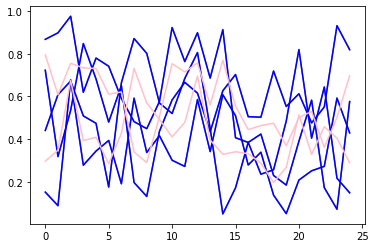

In [10]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,:], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,:], color = 'blue')

plt.plot(average_x, color = 'pink')

In [11]:
# run in parallel
start = time.time()
num_workers = 3
n_samples = 10
n_particles = 1000
f = lambda x : model.sample_n(n_samples=n_samples, n_particles=n_particles, T=T, y=y)
with Pool(num_workers) as p:
        out = p.map(f, range(num_workers))
time.time()-start

100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


20.24319291114807

In [12]:
accepted_x = np.concatenate([out[i][0] for i in range(num_workers)])
cand_x = np.concatenate([out[i][1] for i in range(num_workers)])
average_x = np.mean(accepted_x, axis=0)

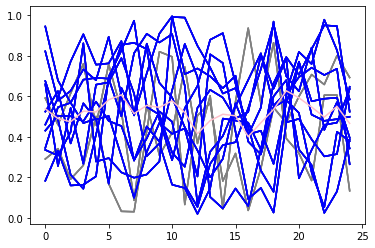

In [14]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(average_x[:,0], color = 'pink')

In [14]:
from PIL import Image
import shutil


accepted_x, cand_x, n_trial = model.sample_n(n_samples=1, n_particles=1000, T=T, y=y)

number_trials = cand_x.shape[0]

100%|██████████| 1/1 [00:14<00:00, 14.07s/it]


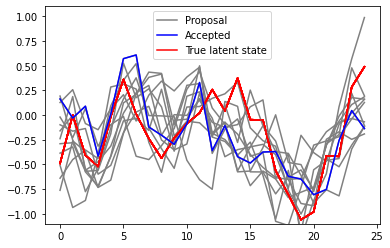

In [15]:

gif_dir = './gif_dir'
if os.path.isdir(gif_dir):
    shutil.rmtree(gif_dir) 
os.mkdir(gif_dir)

j = 0

fig, ax = plt.subplots()

plt.ylim(-1.1,1.1)
ax.plot([], color = 'gray', label = 'Proposal')
ax.plot([], color = 'blue', label = 'Accepted')
ax.plot(xtrue[:,0], color = 'red', label = 'True latent state')
ax.legend()
plt.savefig(os.path.join(gif_dir,'plot_{0}.png'.format(-1)))

number_trials = cand_x.shape[0]
for i in range(number_trials):
    plt.ylim(-1.1,1.1)
    ax.plot(xtrue[:,0], color = 'red', label = 'True latent state')
    ax.plot(cand_x[i,:,0], color = 'gray',label = 'Proposal')
    if (cand_x[i,:,0]==accepted_x[j,:,0]).all():
        ax.plot(accepted_x[j,:,0], color = 'blue', label = 'Accepted')
        j += 1
    plt.savefig(os.path.join(gif_dir,'plot_{0}.png'.format(i)))
    
    

In [16]:
fps = [os.path.join('./gif_dir', 'plot_{0}.png'.format(t)) for t in range(-1,number_trials)]
frames = [Image.open(fn) for fn in fps]
frames[0].save('nonlinearar.gif', format='GIF', append_images=frames[1:], save_all=True, duration=1000, loop=0)

![]('nonlinearar.gif')